# Derivatives Analytics - Options Greeks

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#executive-summary)

**TODO**

### **Resources**: 

- [_Python for Finance (2nd ed.)_](http://shop.oreilly.com/product/0636920117728.do): Chapter 6 Object-Oriented Programming.


- [Object-Oriented Programming in Python](https://python-textbok.readthedocs.io/en/1.0/index.html): From [Errors and exceptions](https://python-textbok.readthedocs.io/en/1.0/Errors_and_Exceptions.html): Errors and Handling exceptions sections. From [Functions](https://python-textbok.readthedocs.io/en/1.0/Functions.html): up to `*args` and `**kwargs` section. Section [Object-oriented programming](https://python-textbok.readthedocs.io/en/1.0/Object_Oriented_Programming.html)

# Executive Summary <a name="executive-summary"></a>

**TODO**

The following sections are organized as follows:

**TODO**

These are the basic imports

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for statistical functions
from scipy import stats

# for Matplotlib plotting
import matplotlib.pyplot as plt

# to do inline plots in the Notebook
%matplotlib inline

# for Operating System operations
import os

# for some mathematical functions
import math

# for date management
import datetime as dt

# to identify iterable data-structures
from collections.abc import Iterable

In [2]:
import os, sys
sys.path.insert(0, os.path.abspath('../pyBlackScholesAnalytics'))

In [3]:
from portfolio.portfolio import Portfolio

In [4]:
Portfolio

portfolio.portfolio.Portfolio

In [5]:
from options.options import EuropeanOption

In [6]:
EuropeanOption

options.options.EuropeanOption

## numeric derivative example $sin(x)$ <a name="example_sin_x"></a>

In [7]:
from utils.utils import plot_compare

In [8]:
x = np.linspace(0, 2*math.pi, 100)

In [9]:
def df_dx(f, x0, eps):
    return (f(x0 + eps) - f(x0 - eps))/(2*eps)

In [10]:
# numeric derivative of sin(x)
f_num_deriv = df_dx(f=np.sin, x0=x, eps=1e-10)

# exact derivative of sin(x): cos(x)
f_exact_deriv = np.cos(x)

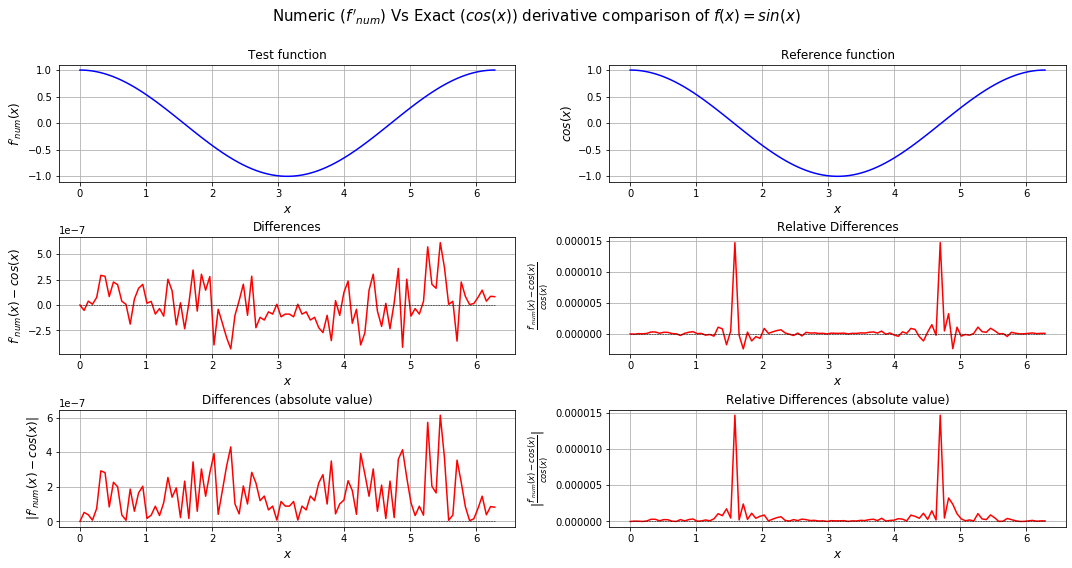

In [11]:
plot_compare(x, f=f_num_deriv, f_ref=f_exact_deriv, 
             f_label=r"f'_{num}(x)", f_ref_label=r"cos(x)",
             title=r"Numeric ($f'_{num}$) Vs Exact ($cos(x)$) derivative comparison of $f(x)=sin(x)$")

# `NumericGreeks` class <a name="NumericGreeks_class"></a>

In [12]:
from market.market import MarketEnvironment

In [13]:
mkt_env = MarketEnvironment()

Initializing the MarketEnvironment!


In [14]:
from options.options import PlainVanillaOption

In [15]:
Vanilla_Call = PlainVanillaOption(mkt_env)

Initializing the EuropeanOption!


In [16]:
common_title_Call = Vanilla_Call.get_info() + "\n" + "Market at emission: " + Vanilla_Call.get_mkt_info()

In [17]:
from utils.numeric_routines import NumericGreeks

In [18]:
NumGreeks = NumericGreeks(Vanilla_Call)

In [19]:
S_min = 50
S_max = 150
num_S = 2000
S = np.linspace(S_min, S_max, num_S)

## Numeric $\Delta$ <a name="Numeric_Delta"></a>

In [20]:
delta_numeric = NumGreeks.delta(S0=S)

In [21]:
from utils.utils import plot

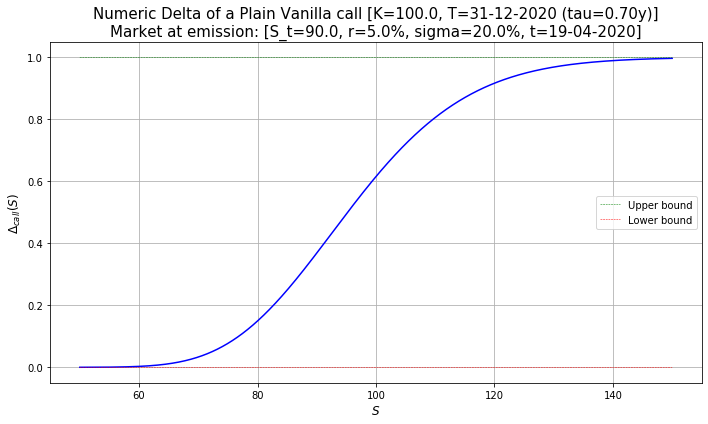

In [22]:
plot(x=S, f=delta_numeric, x_label=r"$S$", f_label=r"$\Delta_{call}(S)$", 
     f_up=np.ones(num_S), f_up_label=r"Upper bound",
     f_down=np.zeros(num_S), f_down_label=r"Lower bound",
     title=r"Numeric Delta of a " + common_title_Call)

## Numeric $\Theta$ <a name="Numeric_Theta"></a>

In [23]:
theta_numeric = NumGreeks.theta(S=S)

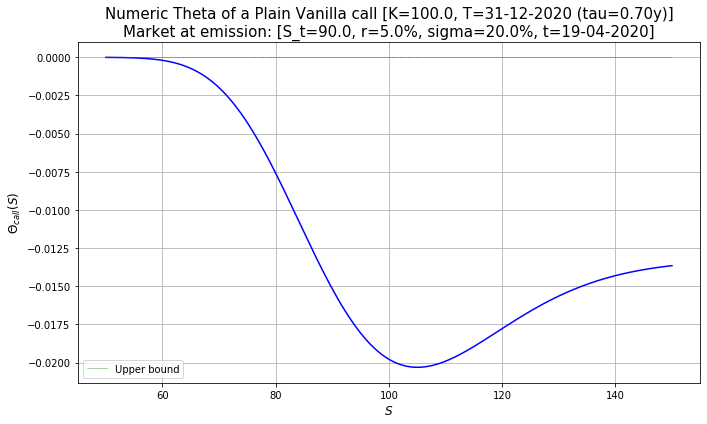

In [24]:
plot(x=S, f=theta_numeric, x_label=r"$S$", f_label=r"$\Theta_{call}(S)$",
     f_up=np.zeros(num_S), f_up_label=r"Upper bound",
     title=r"Numeric Theta of a " + common_title_Call)

## Numeric $\Gamma$ <a name="Numeric_Gamma"></a>

In [25]:
gamma_numeric = NumGreeks.gamma(S0=S)

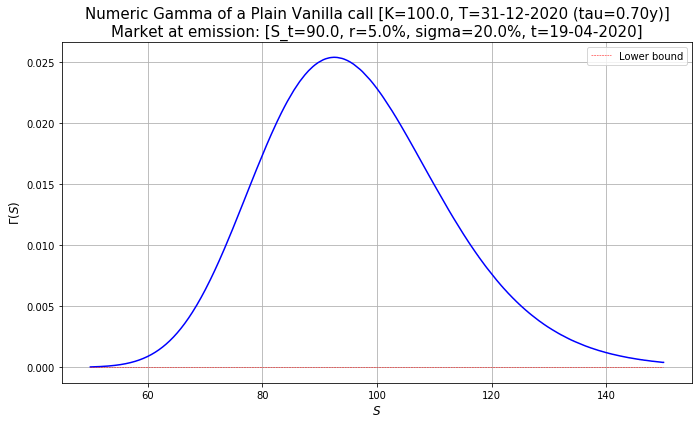

In [26]:
plot(x=S, f=gamma_numeric, x_label=r"$S$", f_label=r"$\Gamma(S)$",
     f_down=np.zeros(num_S), f_down_label=r"Lower bound",
     title=r"Numeric Gamma of a " + common_title_Call)

### Numeric $\Gamma$: effect of $\epsilon$ reduction <a name="Numeric_Gamma_epsilon_reduction"></a>

reducing $\epsilon$ does not guarantee increased accuracy

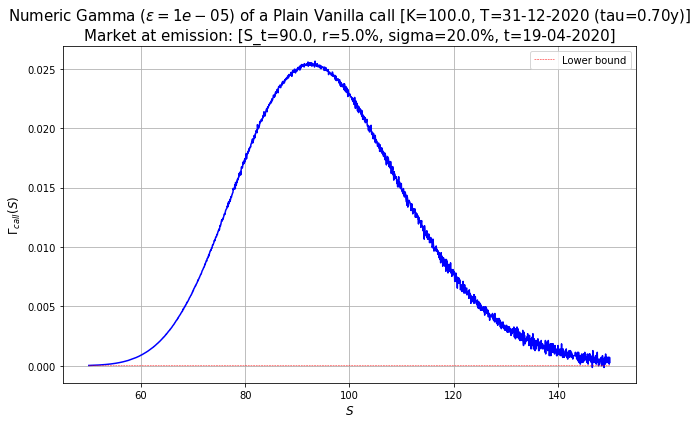

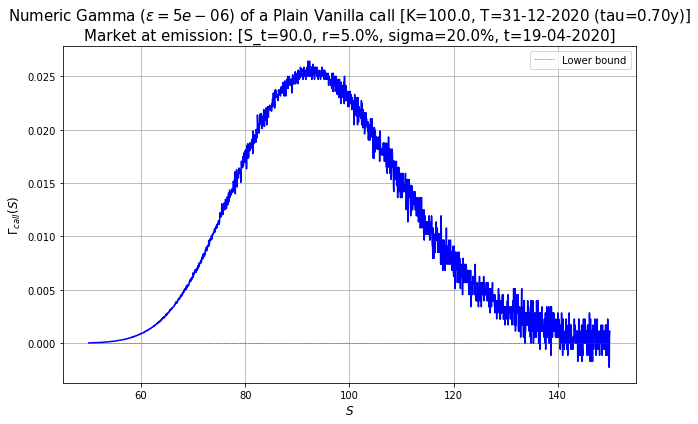

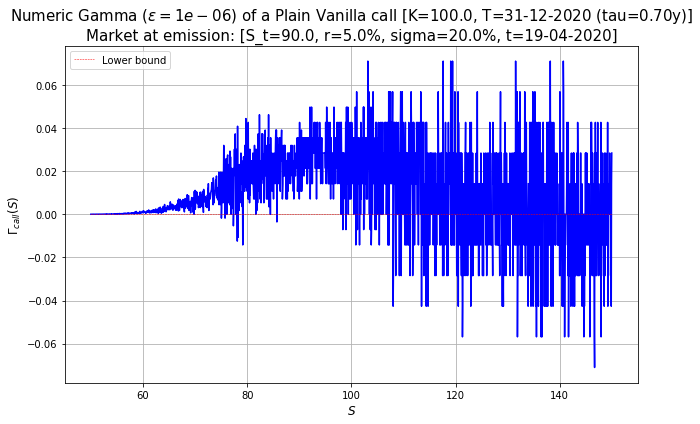

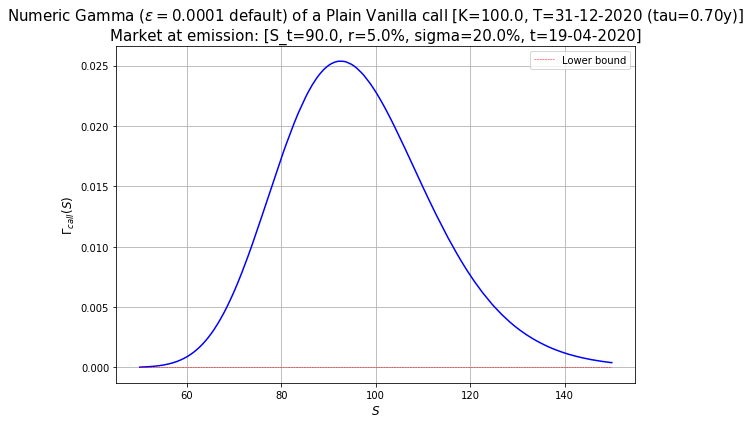

In [27]:
# epsilon reduction: 1e-4 --> 1e-5
NumGreeks.set_epsilon(1e-5)

# numeric gamma
gamma_numeric = NumGreeks.gamma(S0=S)

# gamma plot
plot(x=S, f=gamma_numeric, x_label=r"$S$", f_label=r"$\Gamma_{call}(S)$", 
     f_down=np.zeros(num_S), f_down_label=r"Lower bound",
     title=r"Numeric Gamma ($\epsilon={}$) of a ".format(NumGreeks.get_epsilon()) + common_title_Call)

# epsilon further reduction: 1e-5 --> 5e-6
NumGreeks.set_epsilon(5e-6)

# numeric gamma
gamma_numeric = NumGreeks.gamma(S0=S)

# gamma plot
plot(x=S, f=gamma_numeric, x_label=r"$S$", f_label=r"$\Gamma_{call}(S)$", 
     f_down=np.zeros(num_S), f_down_label=r"Lower bound",
     title=r"Numeric Gamma ($\epsilon={}$) of a ".format(NumGreeks.get_epsilon()) + common_title_Call)

# epsilon even further reduction: 1e-5 --> 1e-6
NumGreeks.set_epsilon(1e-6)

# numeric gamma
gamma_numeric = NumGreeks.gamma(S0=S)

# gamma plot
plot(x=S, f=gamma_numeric, x_label=r"$S$", f_label=r"$\Gamma_{call}(S)$", 
     f_down=np.zeros(num_S), f_down_label=r"Lower bound",
     title=r"Numeric Gamma ($\epsilon={}$) of a ".format(NumGreeks.get_epsilon()) + common_title_Call)

# restoring default value of epsilon
NumGreeks.set_epsilon()

# numeric gamma
gamma_numeric = NumGreeks.gamma(S0=S)

# gamma plot
plot(x=S, f=gamma_numeric, x_label=r"$S$", f_label=r"$\Gamma_{call}(S)$", 
     f_down=np.zeros(num_S), f_down_label=r"Lower bound",
     title=r"Numeric Gamma ($\epsilon={}$ default) of a ".format(NumGreeks.get_epsilon()) + common_title_Call)

## Numeric Vega <a name="Numeric_Vega"></a>

In [28]:
vega_numeric = NumGreeks.vega(S=S)

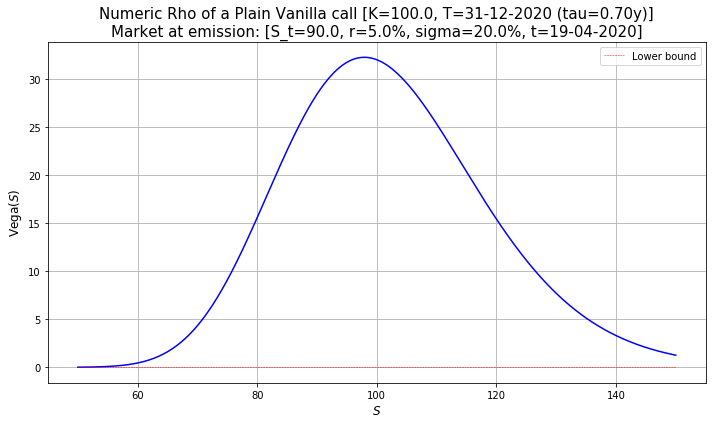

In [29]:
plot(x=S, f=vega_numeric, x_label=r"$S$", f_label=r"Vega$(S)$", 
     f_down=np.zeros(num_S), f_down_label=r"Lower bound",
     title=r"Numeric Rho of a " + common_title_Call)

## Numeric $\rho$ <a name="Numeric_Rho"></a>

In [30]:
rho_numeric = NumGreeks.rho(S=S)

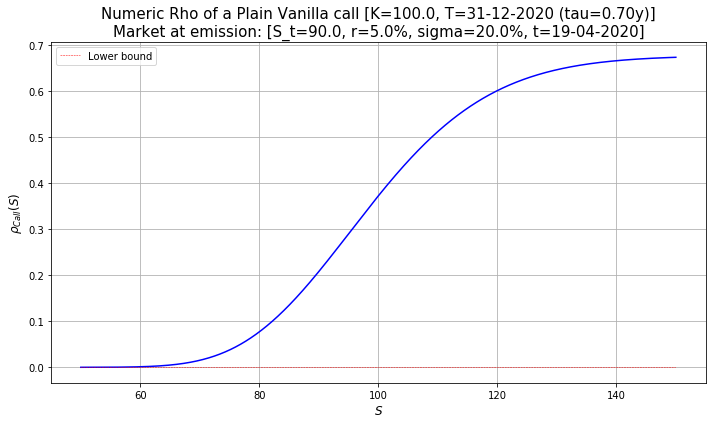

In [31]:
plot(x=S, f=rho_numeric, x_label=r"$S$", f_label=r"$\rho_{Call}(S)$", 
     f_down=np.zeros(num_S), f_down_label=r"Lower bound",
     title=r"Numeric Rho of a " + common_title_Call)

## Put options <a name="Numeric_greeks_put"></a>

delta of a put

In [32]:
Vanilla_Put = PlainVanillaOption(mkt_env, option_type="put")

Initializing the EuropeanOption!


In [33]:
common_title_Put = Vanilla_Put.get_info() + "\n" + "Market at emission: " + Vanilla_Call.get_mkt_info()

In [34]:
NumGreeks = NumericGreeks(Vanilla_Put)

In [35]:
delta_numeric = NumGreeks.delta(S0=S)

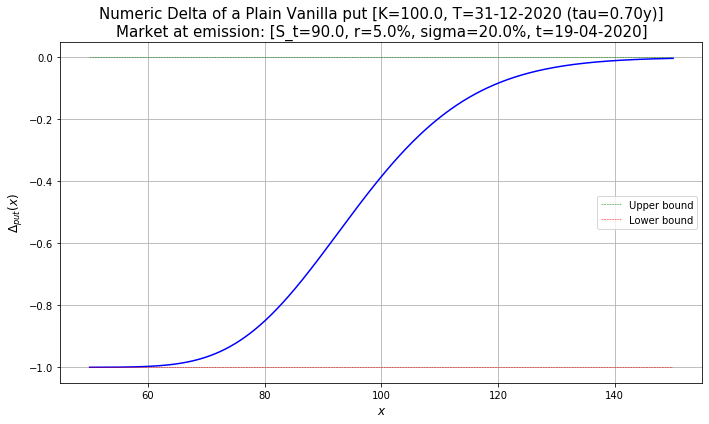

In [36]:
plot(x=S, f=delta_numeric, f_label=r"$\Delta_{Put}(x)$", 
     f_up=np.zeros(len(S)), f_up_label=r"Upper bound",
     f_down=-np.ones(len(S)), f_down_label=r"Lower bound",
     title=r"Numeric Delta of a " + common_title_Put)

# Analytic Vs Numeric greeks <a name="Analytic_Vs_Numeric_Greeks"></a>